## Introduction
For this project, we will interpret data from the National Parks Service about endangered species in different parks.
We will perform some data analysis on the conservation statuses of these species and investigate if there are any patterns or themes to the types of species that become endangered.

#### Import Python Liberies

In [1]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

#### Loading the Data

 We have two comma seperated value (csv) data's that we will be working with, the species_info and observations

In [2]:
species = pd.read_csv("species_info.csv")
observations = pd.read_csv("observations.csv")

In [7]:
species

,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN
1,Mammal,Bos bison,"American Bison, Bison",NaN
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",NaN
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",NaN
4,Mammal,Cervus elaphus,Wapiti Or Elk,NaN
...,...,...,...,...
5819,Vascular Plant,Solanum parishii,Parish's Nightshade,NaN
5820,Vascular Plant,Solanum xanti,"Chaparral Nightshade, Purple Nightshade",NaN
5821,Vascular Plant,Parthenocissus vitacea,"Thicket Creeper, Virginia Creeper, Woodbine",NaN
5822,Vascular Plant,Vitis californica,"California Grape, California Wild Grape",NaN


In [4]:
# observing the first ten values of species dataframe

species.head(10)

,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN
1,Mammal,Bos bison,"American Bison, Bison",NaN
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",NaN
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",NaN
4,Mammal,Cervus elaphus,Wapiti Or Elk,NaN
5,Mammal,Odocoileus virginianus,White-Tailed Deer,NaN
6,Mammal,Sus scrofa,"Feral Hog, Wild Pig",NaN
7,Mammal,Canis latrans,Coyote,Species of Concern
8,Mammal,Canis lupus,Gray Wolf,Endangered
9,Mammal,Canis rufus,Red Wolf,Endangered


In [5]:
# observing the last ten values of species dataframe

species.tail(10)

,category,scientific_name,common_names,conservation_status
5814,Vascular Plant,Cuscuta suksdorfii,Mountain Dodder,NaN
5815,Vascular Plant,Datura wrightii,"Sacred Datura, Sacred Thornapple, Sacred Thorn...",NaN
5816,Vascular Plant,Nicotiana acuminata var. multiflora,Manyflower Tobacco,NaN
5817,Vascular Plant,Nicotiana attenuata,"Coyote Tabacco, Coyote Tobacco",NaN
5818,Vascular Plant,Solanum americanum,"American Black Nightshade, Common Purple Night...",NaN
5819,Vascular Plant,Solanum parishii,Parish's Nightshade,NaN
5820,Vascular Plant,Solanum xanti,"Chaparral Nightshade, Purple Nightshade",NaN
5821,Vascular Plant,Parthenocissus vitacea,"Thicket Creeper, Virginia Creeper, Woodbine",NaN
5822,Vascular Plant,Vitis californica,"California Grape, California Wild Grape",NaN
5823,Vascular Plant,Tribulus terrestris,"Bullhead, Caltrop, Goathead, Mexican Sandbur, ...",NaN


In [6]:
# Here we figure out the number of columns the dataframe is having

species.columns

Index(['category', 'scientific_name', 'common_names', 'conservation_status'], dtype='object')

In [7]:
# Here we check for the unique values of category in the column

species.category.unique()

array(['Mammal', 'Bird', 'Reptile', 'Amphibian', 'Fish', 'Vascular Plant',
       'Nonvascular Plant'], dtype=object)

In [8]:
species.category.value_counts()

Vascular Plant       4470
Bird                  521
Nonvascular Plant     333
Mammal                214
Fish                  127
Amphibian              80
Reptile                79
Name: category, dtype: int64

In [9]:
species.conservation_status.unique()

array([nan, 'Species of Concern', 'Endangered', 'Threatened',
       'In Recovery'], dtype=object)

In [10]:
species.conservation_status.value_counts()

Species of Concern    161
Endangered             16
Threatened             10
In Recovery             4
Name: conservation_status, dtype: int64

In [11]:
species.shape

(5824, 4)

In [12]:
species.describe().T

,count,unique,top,freq
category,5824,7,Vascular Plant,4470
scientific_name,5824,5541,Castor canadensis,3
common_names,5824,5504,Brachythecium Moss,7
conservation_status,191,4,Species of Concern,161


#### Checking for empty or duplicate values in species dataframe

In [13]:
species[species.duplicated(subset=['scientific_name'])]

,category,scientific_name,common_names,conservation_status
3017,Mammal,Cervus elaphus,Rocky Mountain Elk,NaN
3019,Mammal,Odocoileus virginianus,"White-Tailed Deer, White-Tailed Deer",NaN
3020,Mammal,Canis lupus,"Gray Wolf, Wolf",In Recovery
3022,Mammal,Puma concolor,"Cougar, Mountain Lion, Puma",NaN
3025,Mammal,Lutra canadensis,River Otter,NaN
...,...,...,...,...
5619,Vascular Plant,Panicum rigidulum var. rigidulum,"Redtop Panicgrass, Redtop Panicum",NaN
5638,Vascular Plant,Setaria pumila,"Cattail Grass, Yellow Bristle Grass, Yellow Br...",NaN
5640,Vascular Plant,Vulpia bromoides,"Brome Fescue, Brome Six-Weeks Grass, Desert Fe...",NaN
5643,Vascular Plant,Vulpia myuros,"Foxtail Fescue, Rattail Fescue, Rat-Tail Fescu...",NaN


In [14]:
species[species.scientific_name == 'Canis lupus']

,category,scientific_name,common_names,conservation_status
8,Mammal,Canis lupus,Gray Wolf,Endangered
3020,Mammal,Canis lupus,"Gray Wolf, Wolf",In Recovery
4448,Mammal,Canis lupus,"Gray Wolf, Wolf",Endangered


#### Removing Duplicates

In [15]:
species.drop_duplicates(subset=['scientific_name'], keep='last', inplace= True)
species.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5541 entries, 0 to 5823
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   category             5541 non-null   object
 1   scientific_name      5541 non-null   object
 2   common_names         5541 non-null   object
 3   conservation_status  179 non-null    object
dtypes: object(4)
memory usage: 216.4+ KB


In [8]:
species

,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN
1,Mammal,Bos bison,"American Bison, Bison",NaN
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",NaN
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",NaN
4,Mammal,Cervus elaphus,Wapiti Or Elk,NaN
...,...,...,...,...
5819,Vascular Plant,Solanum parishii,Parish's Nightshade,NaN
5820,Vascular Plant,Solanum xanti,"Chaparral Nightshade, Purple Nightshade",NaN
5821,Vascular Plant,Parthenocissus vitacea,"Thicket Creeper, Virginia Creeper, Woodbine",NaN
5822,Vascular Plant,Vitis californica,"California Grape, California Wild Grape",NaN


In [9]:
observations

,scientific_name,park_name,observations
0,Vicia benghalensis,Great Smoky Mountains National Park,68
1,Neovison vison,Great Smoky Mountains National Park,77
2,Prunus subcordata,Yosemite National Park,138
3,Abutilon theophrasti,Bryce National Park,84
4,Githopsis specularioides,Great Smoky Mountains National Park,85
...,...,...,...
23291,Croton monanthogynus,Yosemite National Park,173
23292,Otospermophilus beecheyi,Bryce National Park,130
23293,Heterotheca sessiliflora ssp. echioides,Bryce National Park,140
23294,Dicranella rufescens,Yosemite National Park,171


In [18]:
observations.head(10)

,scientific_name,park_name,observations
0,Vicia benghalensis,Great Smoky Mountains National Park,68
1,Neovison vison,Great Smoky Mountains National Park,77
2,Prunus subcordata,Yosemite National Park,138
3,Abutilon theophrasti,Bryce National Park,84
4,Githopsis specularioides,Great Smoky Mountains National Park,85
5,Elymus virginicus var. virginicus,Yosemite National Park,112
6,Spizella pusilla,Yellowstone National Park,228
7,Elymus multisetus,Great Smoky Mountains National Park,39
8,Lysimachia quadrifolia,Yosemite National Park,168
9,Diphyscium cumberlandianum,Yellowstone National Park,250


In [19]:
observations.tail(10)

,scientific_name,park_name,observations
23286,Symphyotrichum frondosum,Bryce National Park,101
23287,Sasa palmata,Yellowstone National Park,210
23288,Amaranthus hybridus,Great Smoky Mountains National Park,65
23289,Potentilla flabellifolia,Yellowstone National Park,246
23290,Triodanis perfoliata var. perfoliata,Yellowstone National Park,262
23291,Croton monanthogynus,Yosemite National Park,173
23292,Otospermophilus beecheyi,Bryce National Park,130
23293,Heterotheca sessiliflora ssp. echioides,Bryce National Park,140
23294,Dicranella rufescens,Yosemite National Park,171
23295,Cucurbita pepo,Yosemite National Park,164


In [20]:
observations.shape

(23296, 3)

In [21]:
observations.columns

Index(['scientific_name', 'park_name', 'observations'], dtype='object')

In [22]:
observations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23296 entries, 0 to 23295
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   scientific_name  23296 non-null  object
 1   park_name        23296 non-null  object
 2   observations     23296 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 546.1+ KB


In [23]:
observations.values

array([['Vicia benghalensis', 'Great Smoky Mountains National Park', 68],
       ['Neovison vison', 'Great Smoky Mountains National Park', 77],
       ['Prunus subcordata', 'Yosemite National Park', 138],
       ...,
       ['Heterotheca sessiliflora ssp. echioides', 'Bryce National Park',
        140],
       ['Dicranella rufescens', 'Yosemite National Park', 171],
       ['Cucurbita pepo', 'Yosemite National Park', 164]], dtype=object)

In [24]:
observations.describe().T

,count,mean,std,min,25%,50%,75%,max
observations,23296.0,142.287904,69.890532,9.0,86.0,124.0,195.0,321.0


In [25]:
observations.scientific_name.unique()

array(['Vicia benghalensis', 'Neovison vison', 'Prunus subcordata', ...,
       'Ranunculus hebecarpus', 'Gulo gulo', 'Dichanthelium depauperatum'],
      dtype=object)

In [26]:
observations.park_name.unique()

array(['Great Smoky Mountains National Park', 'Yosemite National Park',
       'Bryce National Park', 'Yellowstone National Park'], dtype=object)

In [27]:
#observations.observations.unique()

In [28]:
observations.park_name.value_counts()

Great Smoky Mountains National Park    5824
Yosemite National Park                 5824
Bryce National Park                    5824
Yellowstone National Park              5824
Name: park_name, dtype: int64

In [29]:
observations.scientific_name.value_counts()

Myotis lucifugus                        12
Puma concolor                           12
Hypochaeris radicata                    12
Holcus lanatus                          12
Streptopelia decaocto                   12
                                        ..
Packera dimorphophylla var. paysonii     4
Smilax bona-nox                          4
Chondestes grammacus                     4
Leymus triticoides                       4
Dichanthelium depauperatum               4
Name: scientific_name, Length: 5541, dtype: int64

In [30]:
observations[observations.duplicated(subset=['scientific_name', 'park_name'])]

,scientific_name,park_name,observations
483,Agrostis gigantea,Yellowstone National Park,235
490,Agrostis mertensii,Yosemite National Park,128
945,Rumex crispus,Yellowstone National Park,255
1213,Dianthus barbatus,Bryce National Park,110
1259,Riparia riparia,Bryce National Park,91
...,...,...,...
23258,Microtus longicaudus,Yellowstone National Park,244
23259,Agrostis scabra,Bryce National Park,118
23267,Oxalis corniculata,Yosemite National Park,164
23273,Dactylis glomerata,Bryce National Park,89


####  Let's calculate the total number of observations for duplicate records and then remove the duplicates

In [10]:
observations['total'] = observations.groupby(['scientific_name', 'park_name'])['observations'].transform('sum')
observations.drop_duplicates(subset=['scientific_name', 'park_name'], keep='last', inplace=True)
observations = observations[['scientific_name', 'park_name', 'total']]
observations = observations.rename(columns={'total': 'observations'})
observations

,scientific_name,park_name,observations
0,Vicia benghalensis,Great Smoky Mountains National Park,68
1,Neovison vison,Great Smoky Mountains National Park,77
2,Prunus subcordata,Yosemite National Park,138
3,Abutilon theophrasti,Bryce National Park,84
4,Githopsis specularioides,Great Smoky Mountains National Park,85
...,...,...,...
23291,Croton monanthogynus,Yosemite National Park,173
23292,Otospermophilus beecheyi,Bryce National Park,130
23293,Heterotheca sessiliflora ssp. echioides,Bryce National Park,140
23294,Dicranella rufescens,Yosemite National Park,171


In [32]:
observations.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22164 entries, 0 to 23295
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   scientific_name  22164 non-null  object
 1   park_name        22164 non-null  object
 2   observations     22164 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 692.6+ KB


####  Now let's combine both dataframes into one, on the basis of which we will build plots

In [ ]:
merged_data = pd.merge(observations, species, left_on= 'scientific_name', right_on= 'scientific_name', how='left')
merged_data = observations[['scientific_name', 'park_name','observations','category','conservation_status']]
observations.to_csv('merged_observations.csv')
species.to_csv('species_drop_deplicates.csv')

In [11]:
merged_data = pd.merge(observations, species[['scientific_name', 'category', 'conservation_status']], on='scientific_name', how='left')
merged_data

,scientific_name,park_name,observations,category,conservation_status
0,Vicia benghalensis,Great Smoky Mountains National Park,68,Vascular Plant,NaN
1,Neovison vison,Great Smoky Mountains National Park,77,Mammal,NaN
2,Prunus subcordata,Yosemite National Park,138,Vascular Plant,NaN
3,Abutilon theophrasti,Bryce National Park,84,Vascular Plant,NaN
4,Githopsis specularioides,Great Smoky Mountains National Park,85,Vascular Plant,NaN
...,...,...,...,...,...
23291,Croton monanthogynus,Yosemite National Park,173,Vascular Plant,NaN
23292,Otospermophilus beecheyi,Bryce National Park,130,Mammal,NaN
23293,Heterotheca sessiliflora ssp. echioides,Bryce National Park,140,Vascular Plant,NaN
23294,Dicranella rufescens,Yosemite National Park,171,Nonvascular Plant,NaN


#### Biodiversity by Category:
● Calculate the distribution of species across different categories (e.g., mammals, birds, reptiles,
plants). Determine which categories have the highest and lowest numbers of species.

Distribution of Species Across Categories:
Vascular Plant       17880
Bird                  2084
Nonvascular Plant     1332
Mammal                 856
Fish                   508
Amphibian              320
Reptile                316
Name: category, dtype: int64


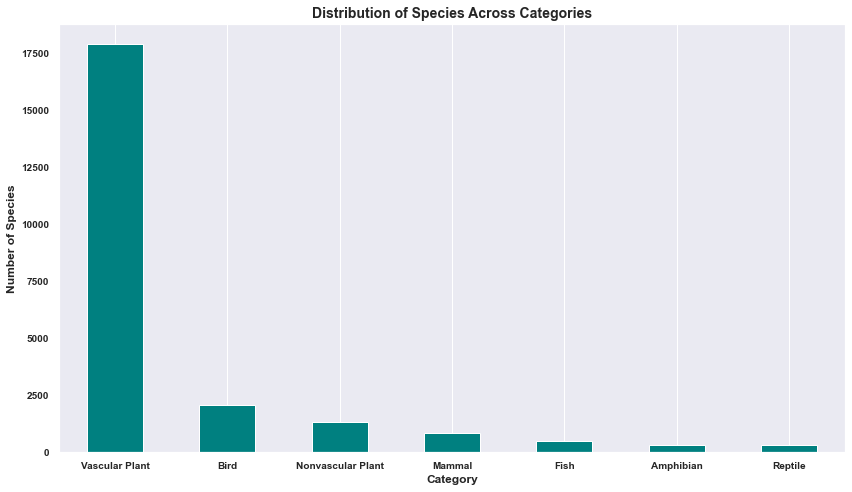


Category with Highest Number of Species: Vascular Plant (Count: 17880)
Category with Lowest Number of Species: Reptile (Count: 316)


In [15]:
# Group the data by category and count the number of species in each category
species_counts = merged_data['category'].value_counts()

# Identify the category with the highest number of species
highest_category = species_counts.idxmax()
highest_count = species_counts.max()

# Identify the category with the lowest number of species
lowest_category = species_counts.idxmin()
lowest_count = species_counts.min()

# Display the distribution and highest/lowest categories
print("Distribution of Species Across Categories:")
print(species_counts)

# Plot a bar chart to visualize the distribution of species across categories
plt.figure(figsize=(12, 7))
sns.set_style('darkgrid')
species_counts.plot(kind='bar', color='teal')
plt.title('Distribution of Species Across Categories',fontsize=14, fontweight='bold')
plt.xlabel('Category',fontsize=12, fontweight='bold')
plt.ylabel('Number of Species',fontsize=12, fontweight='bold')
plt.xticks(rotation=0,fontsize=10, fontweight='bold')
plt.yticks(rotation=0,fontsize=10, fontweight='bold')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Show the plot
plt.show()

print(f"\nCategory with Highest Number of Species: {highest_category} (Count: {highest_count})")
print(f"Category with Lowest Number of Species: {lowest_category} (Count: {lowest_count})")


#### Conservation Status Analysis:
● Investigate the conservation status of species. Identify how many species fall into each conservation category (e.g., endangered, threatened, species of concern etc.) and assess the overall health of the ecosystem.

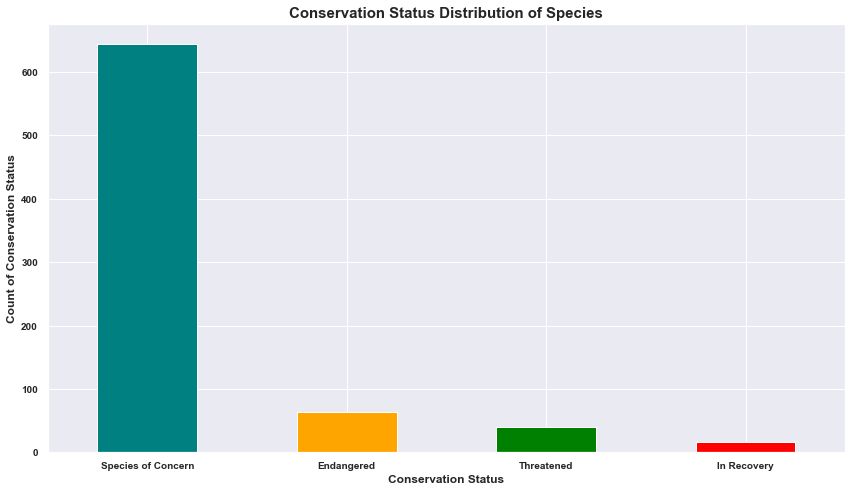

Conservation Status Distribution of Species:
Species of Concern    644
Endangered             64
Threatened             40
In Recovery            16
Name: conservation_status, dtype: int64


In [25]:

# Group the data by conservation status and count the number of species in each category
status_counts = merged_data['conservation_status'].value_counts()

# Create a bar chart
plt.figure(figsize=(12, 7))
status_counts.plot(kind='bar', color=['teal', 'orange', 'green', 'red'])
plt.xlabel('Conservation Status', fontsize=12, fontweight='bold')
plt.ylabel('Count of Conservation Status', fontsize=12, fontweight='bold')
plt.title('Conservation Status Distribution of Species', fontsize=15, fontweight='bold')
plt.xticks(rotation=0,fontsize=10, fontweight='bold')
plt.yticks(rotation=0,fontsize=10, fontweight='bold')
plt.tight_layout()

# Show the plot
plt.show()

# Print the results
print("Conservation Status Distribution of Species:")
print(status_counts)


#### Correlations:
● Explore correlations between variables, such as the relationship between the number of observations and conservation status.

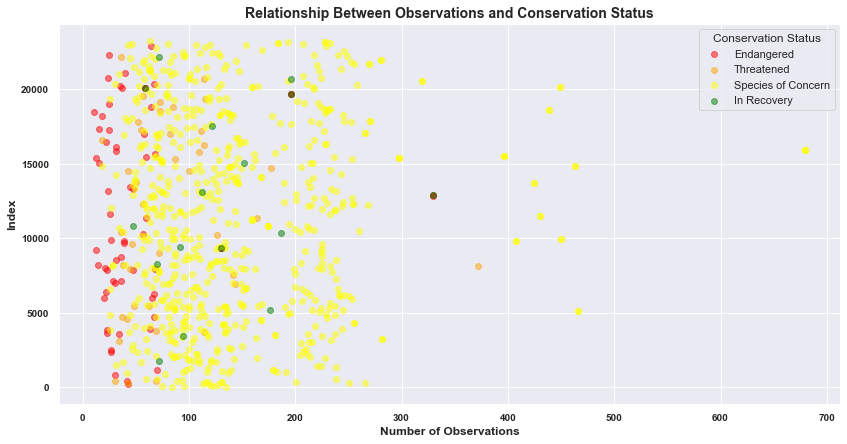

In [26]:
plt.figure(figsize=(14, 7))

# Customize the colors for different conservation statuses
colors = {'Endangered': 'red', 'Threatened': 'orange', 'Species of Concern': 'yellow', 'In Recovery': 'green'}

# Scatter plot
for status, color in colors.items():
    subset = merged_data[merged_data['conservation_status'] == status]
    plt.scatter(subset['observations'], subset.index, label=status, color=color, alpha=0.5)

# Customize the plot
plt.title('Relationship Between Observations and Conservation Status', fontsize=14, fontweight='bold')
plt.xlabel('Number of Observations', fontsize=12, fontweight='bold')
plt.ylabel('Index', fontsize=12, fontweight='bold')
plt.xticks(rotation=0,fontsize=10, fontweight='bold')
plt.yticks(rotation=0,fontsize=10, fontweight='bold')
plt.legend(title='Conservation Status')

# Show the plot
plt.grid(True)
plt.show()


#### Geospatial Analysis:
● Use geospatial tools to map the distribution of species and identify geographic patterns in biodiversity and conservation status.

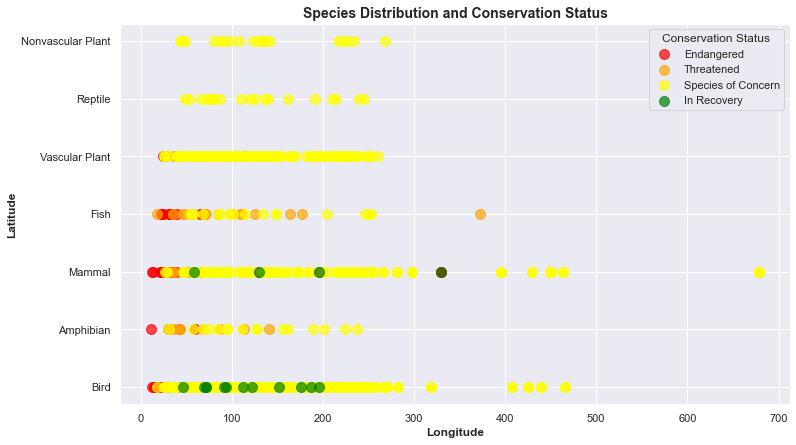

In [40]:
df= pd.DataFrame(merged_data)

# Scatter plot
plt.figure(figsize=(12, 7))

colors = {
    'Endangered': 'red',
    'Threatened': 'orange',
    'Species of Concern': 'yellow',
    'In Recovery': 'green'
}

for status, color in colors.items():
    subset = merged_data[merged_data['conservation_status'] == status]
    plt.scatter(subset['observations'], subset['category'], label=status, color=color, alpha=0.7, s=100)

plt.title('Species Distribution and Conservation Status',fontsize=14, fontweight='bold')
plt.xlabel('Longitude',fontsize=12, fontweight='bold')
plt.ylabel('Latitude',fontsize=12, fontweight='bold')
plt.legend(title='Conservation Status', loc='upper right')

plt.grid(True)
plt.show()


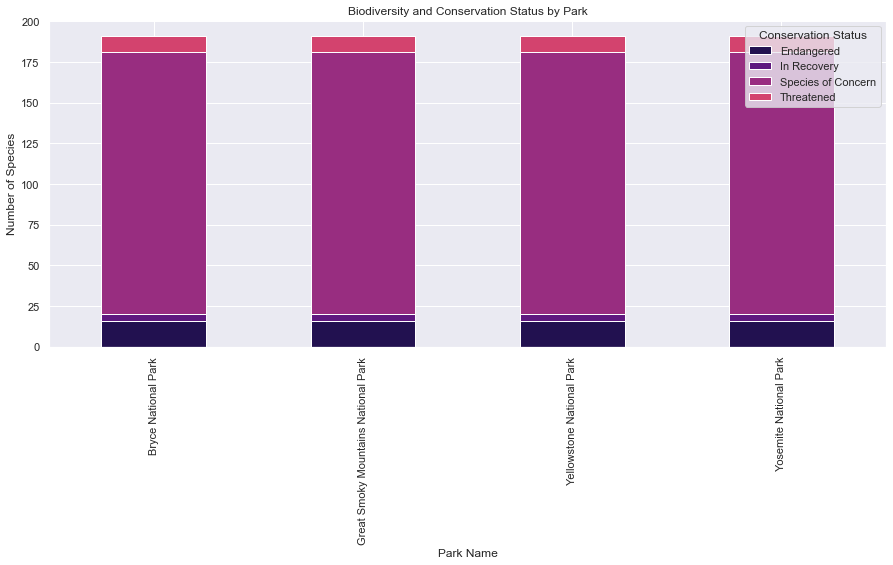

In [30]:

# Group by park_name and conservation_status and count species
biodiversity_data = merged_data.groupby(['park_name', 'conservation_status'])['scientific_name'].count().reset_index()

# Pivot the data for plotting
pivot_biodiversity_data = biodiversity_data.pivot(index='park_name', columns='conservation_status', values='scientific_name').fillna(0)

# Create a stacked bar chart
ax = pivot_biodiversity_data.plot(kind='bar', stacked=True, figsize=(15, 6))

# Customize the chart
plt.title('Biodiversity and Conservation Status by Park')
plt.xlabel('Park Name')
plt.ylabel('Number of Species')
plt.legend(title='Conservation Status', loc='upper right')

# Show the chart
plt.show()


In [12]:
merged_data

,scientific_name,park_name,observations,category,conservation_status
0,Vicia benghalensis,Great Smoky Mountains National Park,68,Vascular Plant,NaN
1,Neovison vison,Great Smoky Mountains National Park,77,Mammal,NaN
2,Prunus subcordata,Yosemite National Park,138,Vascular Plant,NaN
3,Abutilon theophrasti,Bryce National Park,84,Vascular Plant,NaN
4,Githopsis specularioides,Great Smoky Mountains National Park,85,Vascular Plant,NaN
...,...,...,...,...,...
23291,Croton monanthogynus,Yosemite National Park,173,Vascular Plant,NaN
23292,Otospermophilus beecheyi,Bryce National Park,130,Mammal,NaN
23293,Heterotheca sessiliflora ssp. echioides,Bryce National Park,140,Vascular Plant,NaN
23294,Dicranella rufescens,Yosemite National Park,171,Nonvascular Plant,NaN


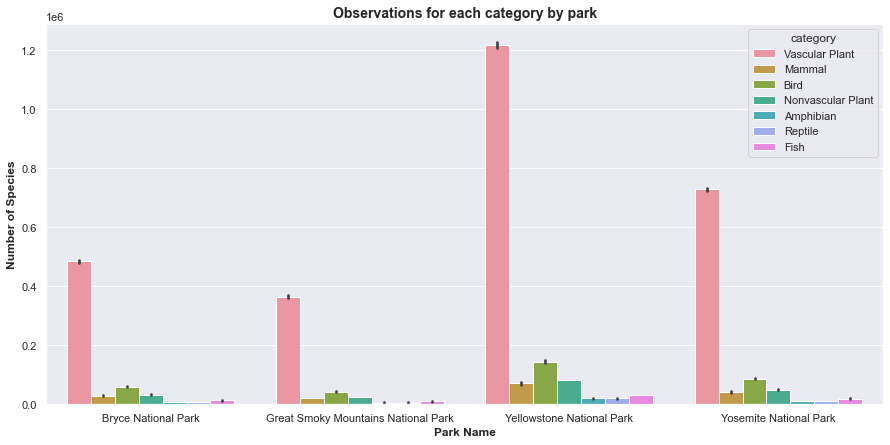

In [32]:
# Define the custom order for park
order = ['Bryce National Park', 'Great Smoky Mountains National Park', 'Yellowstone National Park', 'Yosemite National Park']
plt.figure(figsize=(15, 7))
sns.set_palette('magma')
sns.set_context('notebook')
sns.barplot(x='park_name', y='observations', data=merged_data, hue='category', estimator=np.sum, order=order)
plt.xlabel('Park Name',fontsize=12, fontweight='bold')
plt.ylabel('Number of Species',fontsize=12, fontweight='bold')
plt.title('Observations for each category by park', fontsize=14, fontweight='bold')
plt.show()

#### Species Categories:

Examine the distribution of species across different categories. This could include mammals, birds, reptiles, etc. Which categories are more prevalent in each park?

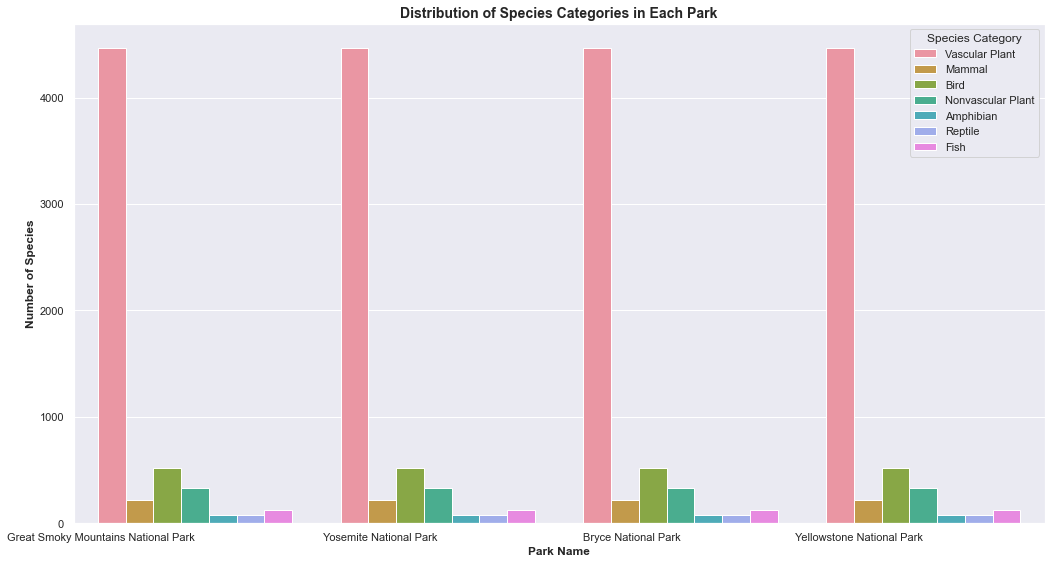

In [33]:
# Create a bar plot to show the distribution of species categories in each park
plt.figure(figsize=(15, 8))
sns.countplot(x='park_name', hue='category', data=merged_data)
plt.title('Distribution of Species Categories in Each Park',fontsize=14, fontweight='bold')
plt.xlabel('Park Name',fontsize=12, fontweight='bold')
plt.ylabel('Number of Species',fontsize=12, fontweight='bold')
plt.xticks(rotation=0, ha='right')
plt.legend(title='Species Category', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()



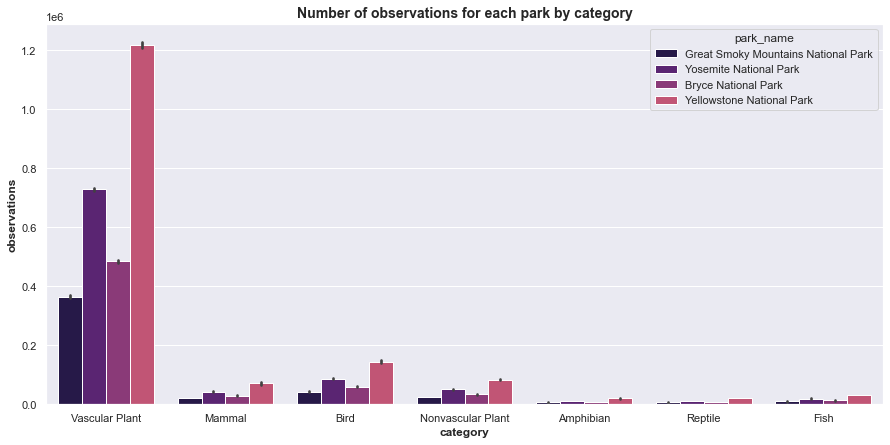

In [34]:
plt.figure(figsize=(15, 7))
sns.barplot(x='category', y='observations', data=merged_data, hue='park_name', estimator=np.sum)
plt.xlabel('category',fontsize=12, fontweight='bold')
plt.ylabel('observations',fontsize=12, fontweight='bold')
plt.title('Number of observations for each park by category', fontsize=14, fontweight='bold')
plt.show()

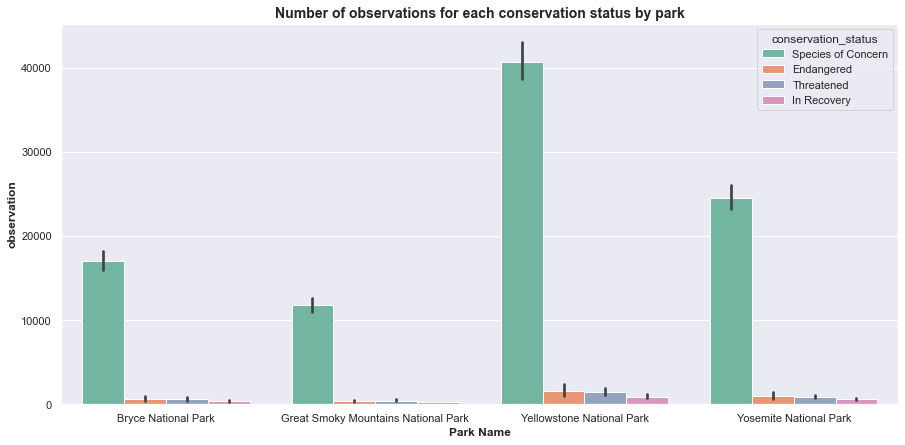

In [36]:
plt.figure(figsize=(15, 7))
sns.set_palette('Set2')
sns.barplot(x='park_name', y='observations', data=merged_data, hue='conservation_status', estimator=np.sum, order=order)
plt.xlabel('Park Name',fontsize=12, fontweight='bold')
plt.ylabel('observation',fontsize=12, fontweight='bold')
plt.title('Number of observations for each conservation status by park',fontsize=14, fontweight='bold')
plt.show()

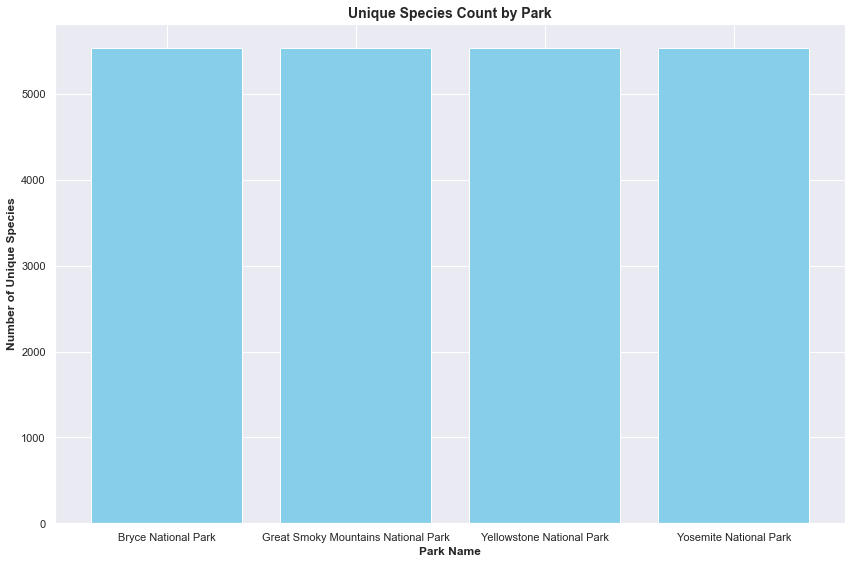

In [37]:
# Group the data by park_name and count unique scientific names
species_count_by_park = merged_data.groupby('park_name')['scientific_name'].nunique().reset_index()

# Create a bar chart to visualize the species count in each park
plt.figure(figsize=(12, 8))
plt.bar(species_count_by_park['park_name'], species_count_by_park['scientific_name'], color='skyblue')
plt.title('Unique Species Count by Park',fontsize=14, fontweight='bold')
plt.xlabel('Park Name',fontsize=12, fontweight='bold')
plt.ylabel('Number of Unique Species',fontsize=12, fontweight='bold')
plt.xticks(rotation=0)
plt.tight_layout()

# Show the chart
plt.show()
